# Demo to run ECmean4 functions within the AQUA framework

We load the AQUA module

In [1]:
import sys
sys.path.append("/users/sughosh/AQUA")
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [16]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco79-orca1'
year1 = 2000
year2 = 2002
numproc = 1
interface = '../config/interface_AQUA.yml'
config = '../config/ecmean_config_replicability.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [148]:
clim=xr.open_mfdataset("/pfs/lustrep3/scratch/project_465000454/kkeller/AQUA/diagnostics/ecmean/ECmean4/ecmean/climatology/EC23/r360x180/*")
clim= clim.isel(time=0).squeeze().ta

In [138]:
reader_atm2d = Reader(model="IFS", exp="tco79-eORCA2", source="atm2d", areas=False)
data_atm2d = reader_atm2d.retrieve(fix=True)
reader_atm3d = Reader(model="IFS", exp="tco79-eORCA2", source="atm3d", areas=False)
data_atm3d = reader_atm3d.retrieve(fix=True)

data = data_atm3d.merge(data_atm2d)

data["2t"].attrs["units"]=data["2t"].attrs["GRIB_units"]
data["msl"].attrs["units"]=data["msl"].attrs["GRIB_units"]
data["tprate"].attrs["units"]=data["tprate"].attrs["GRIB_units"]
data["t"].attrs["units"]=data["t"].attrs["GRIB_units"]
data["u"].attrs["units"]=data["u"].attrs["GRIB_units"]
data["v"].attrs["units"]=data["v"].attrs["GRIB_units"]
data["q"].attrs["units"]=data["q"].attrs["GRIB_units"]

data= data.rename({"height":"plev"})
data = data.interp_like(clim)

/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/conda/lib/python3.10/site-packages/xarray

In [126]:
data

<xarray.Dataset>
Dimensions:  (lon: 360, time: 360, plev: 19, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Data variables:
    ta       (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    ua       (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    va       (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    qa       (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    2t       (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-08-14 15:25:09 coordinates adjusted by AQUA fixer;\n

2023-08-14 15:37:32 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.4: Running global_mean!


2023-08-14 15:37:32 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-08-14 15:37:32 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-08-14 15:37:32 | ecmean.libs.support |  WARNING -> No mask available for oceanic vars, this might lead to inconsistent results...


Average: psl ALL Global 1011.4104775522951
Average: tas ALL Global 12.30753396153375
Average: pr ALL Global 2.7384509883951216


2023-08-14 15:37:37 | ecmean |  WARNING -> Analysis done in 4.5677 seconds
2023-08-14 15:37:38 | ecmean |  WARNING -> Postproc done in 1.3234 seconds


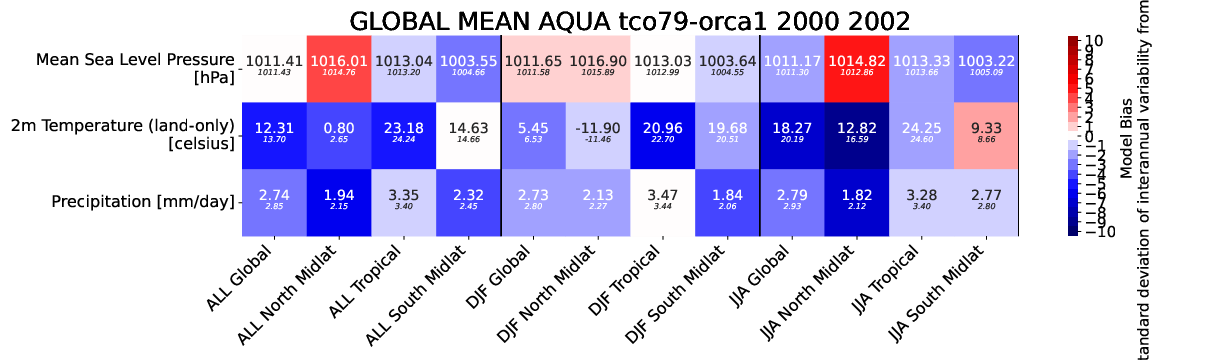

In [136]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)
img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/global_mean_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

2023-08-14 15:57:40 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...
2023-08-14 15:57:40 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!


Welcome to ECmean4 v0.1.4: Running performance_indices!


2023-08-14 15:57:42 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-08-14 15:57:43 | ecmean |  WARNING -> Preproc in 3.5436 seconds


PI for Global ALL ta 3274.931
PI for Global DJF ta 2447.225
PI for Global JJA ta 2225.223
PI for Global ALL ua 5.332
PI for Global DJF ua 193.792
PI for Global JJA ua 170.943
PI for Global ALL va 2.381
PI for Global DJF va 23.775
PI for Global JJA va 9.094
PI for Global ALL hus 866391.842
PI for Global DJF hus 651333.83
PI for Global JJA hus 791880.922
PI for Global ALL psl 3.425
PI for Global DJF psl 1.804
PI for Global JJA psl 4.5
PI for Global ALL tas 31.521
PI for Global DJF tas 19.858
PI for Global JJA tas 36.618
PI for Global ALL pr 4.38
PI for Global DJF pr 2.37
PI for Global JJA pr 32.953


2023-08-14 16:00:33 | ecmean |  WARNING -> Done in 169.4196 seconds with 1 processors
2023-08-14 16:00:34 | ecmean |  WARNING -> Postproc done in 1.3740 seconds


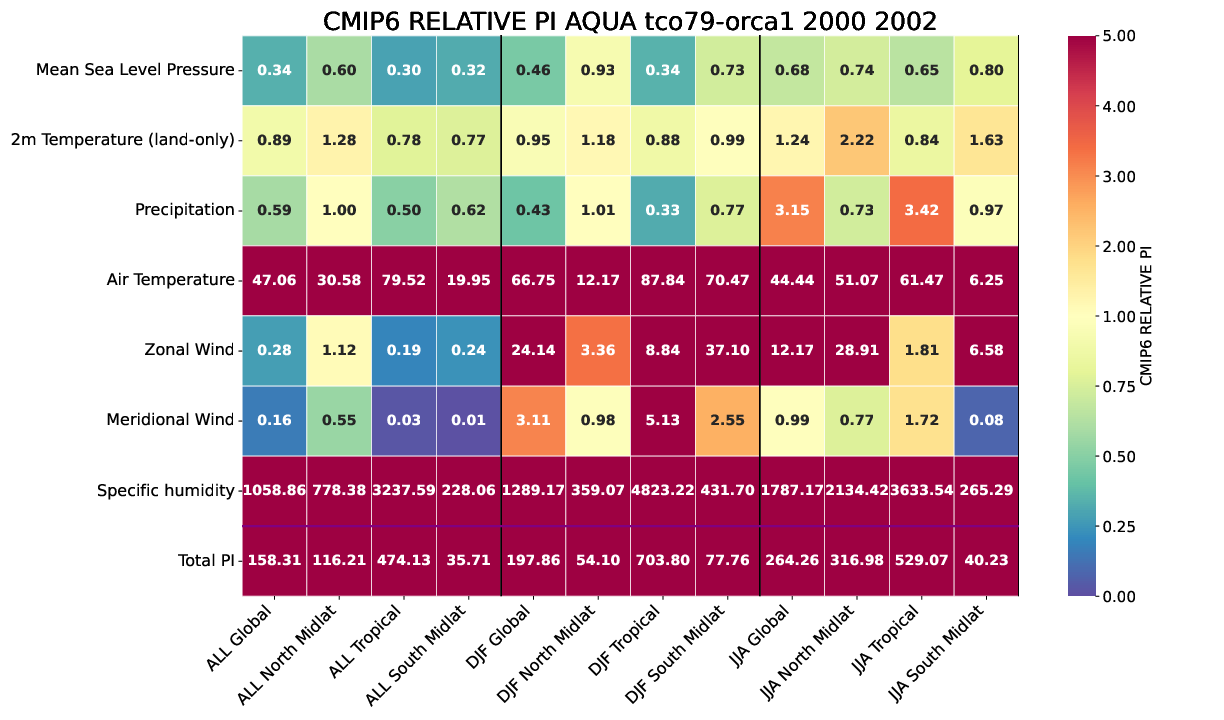

In [146]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/PI4_EC23_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img